<h1 style="text-align:center;">Image Analysis</h1>

Before anything, let's import the libraries we need and define some basic variables:

In [ ]:
import sqlite3
import matplotlib as mpl
mpl.use
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np
from cycler import cycler

from scipy import stats
from analysis.image_recon.plot_taskers import *
from analysis.regression.data_prep import DataPreparation

font = {'family' : 'normal',
        'weight': 'normal',
        'size'   : 15}

mpl.rc('font', **font)

colors_binary = ["#1696d2", "#fdbf11"]
colors_ethnic = ["#1696d2", "#fdbf11", "#55b748", "#d2d2d2"]
colors_pretty = [(0.114, 0.569, 0.749), (0.263, 0.714, 0.769), (0.51, 0.808, 0.737), (0.784, 0.918, 0.718)]

## Table of contents:
* [Intro](#sec-intro)
* [Prior hypothesis](#sec-hypoth)
* [Considered APIs](#sec-hypoth)
* [Benchmarking APIs](#sec-hypoth)
* [Analysis](#alys-alysis)

<h2 id="sec-intro">Intro</h2>

For this section we are going to dive into analysing the images that taskers upload to TaskRabbit. We are going to evaluate different image processing APIs which help us determine the ethnicity, gender, age etc. of taskers and perhaps find some sort of correlation between these factors and the prices offered by these taskers (as well as the positivity of the reviews they are given by users).

<h2 id="sec-intro">Prior hypotheses</h2>

Below are some hypothesis I came up with before starting the analysis. We will later see if these are satisfied in any way or if new theories come to mind.
<ol>
    <li>Prices of non-white taskers are generally lower as a consequence of the prejudism users show when chosing the right tasker for the job. </li>
    <li></li>
</ol>

<h2 id="sec-intro">Considered APIs</h2>

Firstly we evaluate which API is best suited to predict the factors we need to obtain from the tasker images. To do so, we download a test dataset called the UTKFace Dataset. We will use samples from this dataset to test the accuracy of the APIs we wish to

<h2 id="sec-intro">Benchmarking</h2>

Firstly we evaluate which API is best suited to predict the factors we need to obtain from the tasker images. To do so, we download a test dataset called the UTKFace Dataset. We will use samples from this dataset to test the accuracy of the APIs we wish to

<h2 id="sec-intro">Analysis</h2>

Let us analyse Los Angeles to see if we find any particular trends within the data regarding the predicted age, gender or ethnicity of the taskers. First we get the service ids and plot the number of taskers predicted per gender, and per ethnicity:

[50.62006764 21.65242165 24.52830189]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


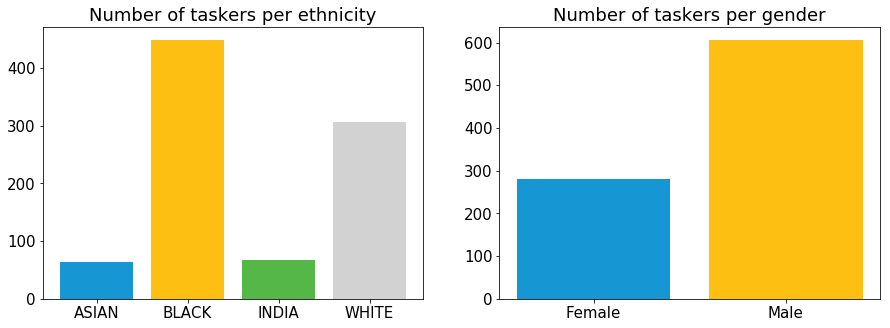

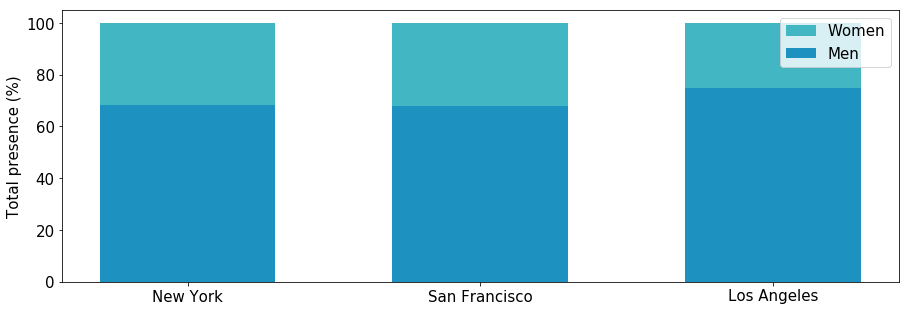

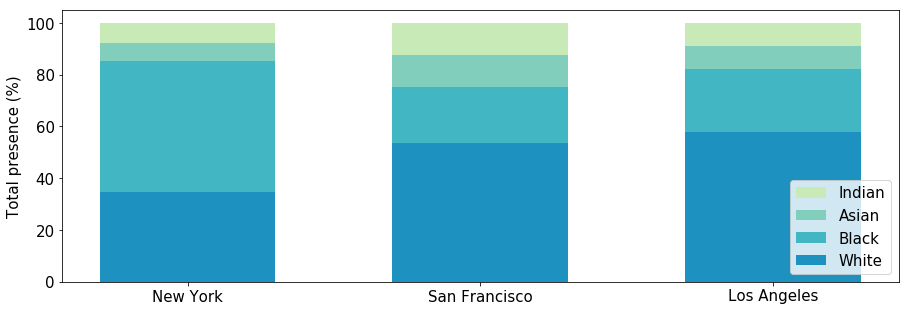

In [14]:
conn = sqlite3.connect("databases/taskrabbit_ny.db")
c = conn.cursor()

c.execute("SELECT service_id,name FROM services")

services = list(c.fetchall())

ethnic_count = get_num_ethnicity(c)
gender_count = get_num_gender(c)

fig_original = plt.figure(figsize=(15, 5))
rows, columns = 1, 2
fig_original.add_subplot(1, 2, 1, title="Number of taskers per ethnicity").bar(ethnic_count[0], ethnic_count[1], color=colors_ethnic)
fig_original.add_subplot(1, 2, 2, title="Number of taskers per gender").bar(gender_count[0], gender_count[1], color=colors_binary)
##############SEP###########################################

conn_ny = sqlite3.connect("databases/taskrabbit_ny.db")
conn_sf = sqlite3.connect("databases/taskrabbit_san_francisco.db")
conn_la = sqlite3.connect("databases/taskrabbit_los_angeles.db")
c_ny = conn_ny.cursor()
c_sf = conn_sf.cursor()
c_la = conn_la.cursor()

ethnic_count_ny = get_num_ethnicity(c_ny)
ethnic_count_sf = get_num_ethnicity(c_sf)
ethnic_count_la = get_num_ethnicity(c_la)

gender_count_ny = get_num_gender(c_ny)
gender_count_sf = get_num_gender(c_sf)
gender_count_la = get_num_gender(c_la)

female = np.array([gender_count_ny[1][0]/sum(gender_count_ny[1]), 
           gender_count_sf[1][0]/sum(gender_count_sf[1]), 
           gender_count_la[1][0]/sum(gender_count_la[1])])

male = (1 - female) * 100
female *= 100

figu = plt.figure(figsize=(15, 5))
ind = [1, 1.05, 1.1]   # the x locations for the groups
width = 0.03       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, male, width, color=(0.114, 0.569, 0.749))
p2 = plt.bar(ind, female, width,
             bottom=male,color=(0.263, 0.714, 0.769))

plt.ylabel('Total presence (%)')
plt.xticks(ind, ('New York', 'San Francisco', 'Los Angeles'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p2[0], p1[0]), ('Women', 'Men'))

asian = np.array([ethnic_count_ny[1][0]/sum(ethnic_count_ny[1]),
        ethnic_count_sf[1][0]/sum(ethnic_count_sf[1]),
        ethnic_count_la[1][0]/sum(ethnic_count_la[1])]) * 100
black = np.array([ethnic_count_ny[1][1]/sum(ethnic_count_ny[1]),
        ethnic_count_sf[1][1]/sum(ethnic_count_sf[1]),
        ethnic_count_la[1][1]/sum(ethnic_count_la[1])]) * 100
india = np.array([ethnic_count_ny[1][2]/sum(ethnic_count_ny[1]),
        ethnic_count_sf[1][2]/sum(ethnic_count_sf[1]),
        ethnic_count_la[1][2]/sum(ethnic_count_la[1])]) * 100
white = np.array([ethnic_count_ny[1][3]/sum(ethnic_count_ny[1]),
        ethnic_count_sf[1][3]/sum(ethnic_count_sf[1]),
        ethnic_count_la[1][3]/sum(ethnic_count_la[1])]) * 100

print (black)
figu1 = plt.figure(figsize=(15, 5))
ind = [1, 1.05, 1.1]    # the x locations for the groups
width = 0.03     # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, white, width, color=(0.114, 0.569, 0.749))
p2 = plt.bar(ind, black, width,
             bottom=white, color=(0.263, 0.714, 0.769))
p3 = plt.bar(ind, asian, width,
             bottom=black + white, color=(0.51, 0.808, 0.737))
p4 = plt.bar(ind, india, width,
             bottom=white + black + asian, color=(0.784, 0.918, 0.718))

plt.ylabel('Total presence (%)')
plt.xticks(ind, ('New York', 'San Francisco', 'Los Angeles'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p4[0], p3[0], p2[0], p1[0]), ('Indian', 'Asian', 'Black', 'White'))

figu.savefig('plots report/gender_diff.png')
figu1.savefig('plots report/ethnic_diff.png')

'''
figu1 = plt.figure(figsize=(15, 5))
ind = np.array([1, 1.12, 1.24])    # the x locations for the groups
width = 0.02     # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, white, width, color=(0.114, 0.569, 0.749))
p2 = plt.bar(ind + width, black, width, color=(0.263, 0.714, 0.769))
p3 = plt.bar(ind + width * 2, asian, width, color=(0.51, 0.808, 0.737))
p4 = plt.bar(ind + width * 3, india, width, color=(0.784, 0.918, 0.718))

plt.ylabel('Total presence (%)')
plt.xticks(ind + width * 1.5, ('New York', 'San Francisco', 'Los Angeles'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p4[0], p3[0], p2[0], p1[0]), ('Indian', 'Asian', 'Black', 'White'))

figu.savefig('plots report/gender_diff.png')
figu1.savefig('plots report/ethnic_diff.png')
'''


plt.show()

Now we prepare and show the plots:

(['BLACK', 'WHITE', 'INDIA', 'ASIAN'], [30.58, 25.88, 27.055, 25.88])
(['BLACK', 'WHITE', 'INDIA', 'ASIAN'], [52.94, 50.58, 49.405, 57.64])
(['BLACK', 'WHITE', 'INDIA', 'ASIAN'], [37.05, 35.465, 35.465, 40.75])
(['BLACK', 'WHITE', 'INDIA', 'ASIAN'], [41.17, 41.17, 40.0, 45.290000000000006])
(['BLACK', 'WHITE', 'INDIA', 'ASIAN'], [41.17, 41.17, 36.47, 49.41])
(['BLACK', 'WHITE', 'INDIA', 'ASIAN'], [23.52, 24.7, 24.7, 23.52])
(['BLACK', 'WHITE', 'INDIA', 'ASIAN'], [58.82, 56.47, 60.0, 63.52])
(['BLACK', 'WHITE', 'INDIA', 'ASIAN'], [47.05, 48.23, 46.465, 44.11])
(['BLACK', 'WHITE', 'INDIA', 'ASIAN'], [58.82, 70.58, 45.875, 74.11])
(['BLACK', 'WHITE', 'INDIA', 'ASIAN'], [54.114999999999995, 61.175, 51.17, 81.17])
(['BLACK', 'WHITE', 'INDIA', 'ASIAN'], [23.52, 23.52, 23.52, 30.58])
(['BLACK', 'WHITE', 'INDIA', 'ASIAN'], [23.52, 23.52, 27.055, 28.229999999999997])
41.17 41.17 38.235 44.7


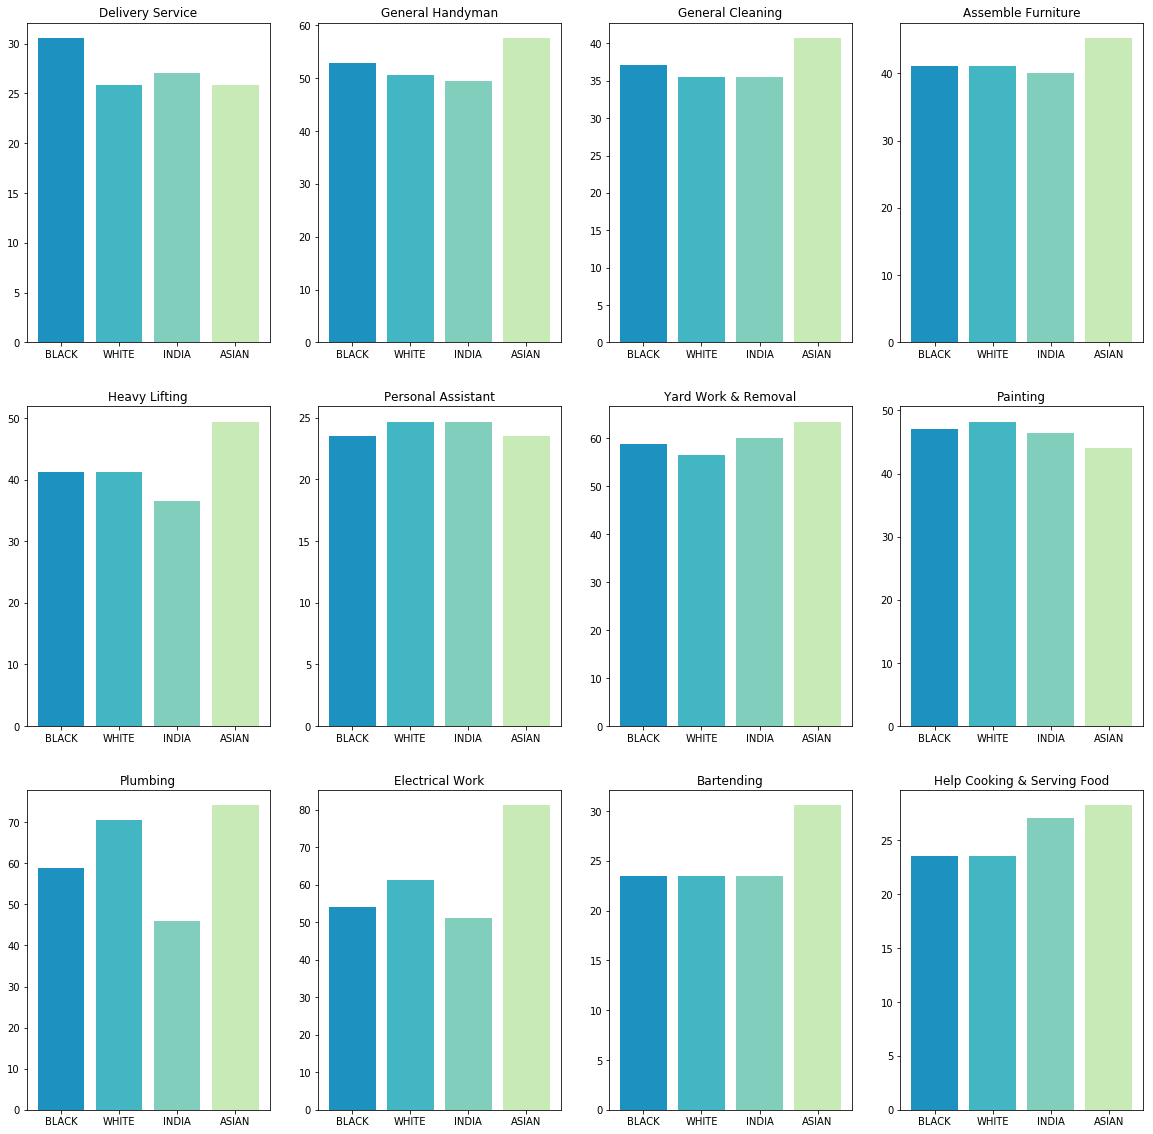

In [5]:
plot_data = {service: get_median_price_by_ethnicity(c, service[0]) for service in services}

fig_original = plt.figure(figsize=(20, 20))
rows, columns = 3, 4

[fig_original.add_subplot(rows, columns, i + 1, title=service[1])
 .bar(plot_data[service][0], plot_data[service][1], color=colors_pretty) 
for i, service in enumerate(plot_data.keys())]

avg_prices = {
    "black": [],
    "white": [],
    "indian": [],
    "asian": []
}
for service in plot_data.keys():
    print (plot_data[service])
    avg_prices["black"].append(plot_data[service][1][0])
    avg_prices["white"].append(plot_data[service][1][1])
    avg_prices["indian"].append(plot_data[service][1][2])
    avg_prices["asian"].append(plot_data[service][1][3])
black_med = np.median(avg_prices["black"])
white_med = np.median(avg_prices["white"])
indian_med = np.median(avg_prices["indian"])
asian_med = np.median(avg_prices["asian"])

print (black_med, white_med, indian_med, asian_med)

plt.show()

We can clearly see that the prices set by black taskers are consistently low across most of the services. This could be a direct consequence of the fact that most U.S. murder arrests come from the black or african american ethnicity. From 2013 UCR data:

<table>
    <tr><td>Black or African Americans</td><td>51.3%</td></tr>
    <tr><td>White Americans (non-Hispanic Americans)</td><td>33.5%</td></tr>
    <tr><td>Hispanic Americans</td><td>12.8%</td></tr>
    <tr><td>American Indians or Alaska Natives</td><td>1.14%</td></tr>
    <tr><td>Asian Americans</td><td>1.18%</td></tr>
</table>

This could mean clients tend to have less trust in this ethnic group, which in turn leads to them lowering the prices. 

In [6]:
print ("%1.2f" % np.average([(np.average(plot_data[service][1]) - plot_data[service][1][0]) / np.average(plot_data[service][1]) * 100
for i, service in enumerate(plot_data.keys())]) + "%")

2.32%


Now let us take a look at the relationship between median price and gender. We plot in the same way:

41.760000000000005 36.47


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


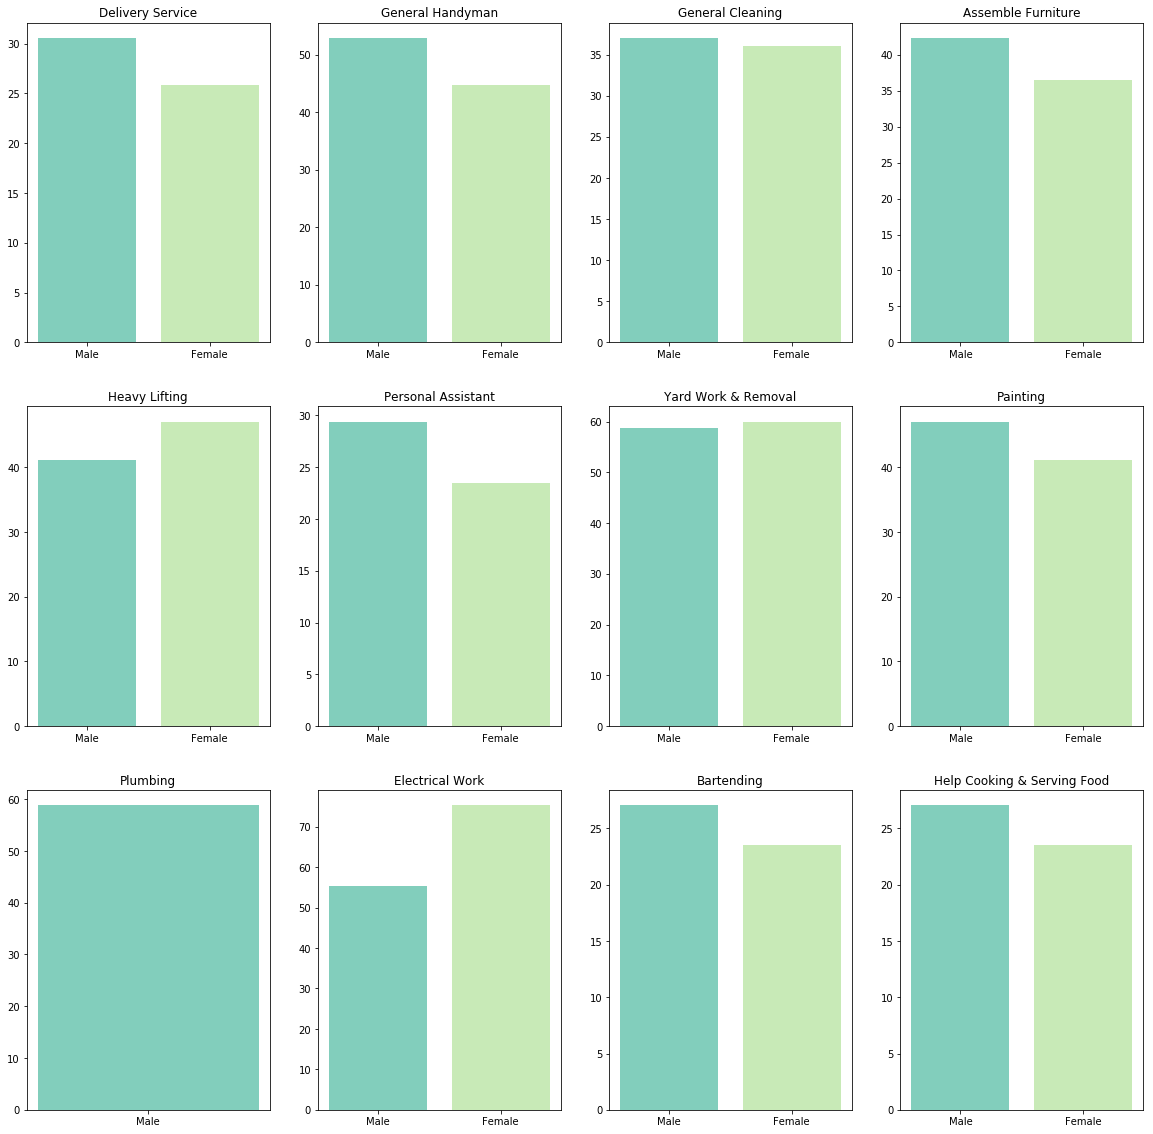

In [7]:
plot_data = {service: get_median_price_by_gender(c, service[0]) for service in services}

fig_original = plt.figure(figsize=(20, 20))
rows, columns = 3, 4

[fig_original.add_subplot(rows, columns, i + 1, title=service[1])
 .bar(plot_data[service][0], plot_data[service][1], color=colors_pretty[2:]) 
for i, service in enumerate(plot_data.keys())]

male_prices = []
female_prices = []
for service in plot_data.keys():
    male_prices.append(plot_data[service][1][0])
    female_prices.append(plot_data[service][1][1])


median_male = np.median(male_prices)
median_female = np.nanmedian(female_prices)

print (median_male, median_female)

fig_original.savefig('plots report/gender_pricediff_sf.png')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


ValueError: The input must have at least 3 entries!

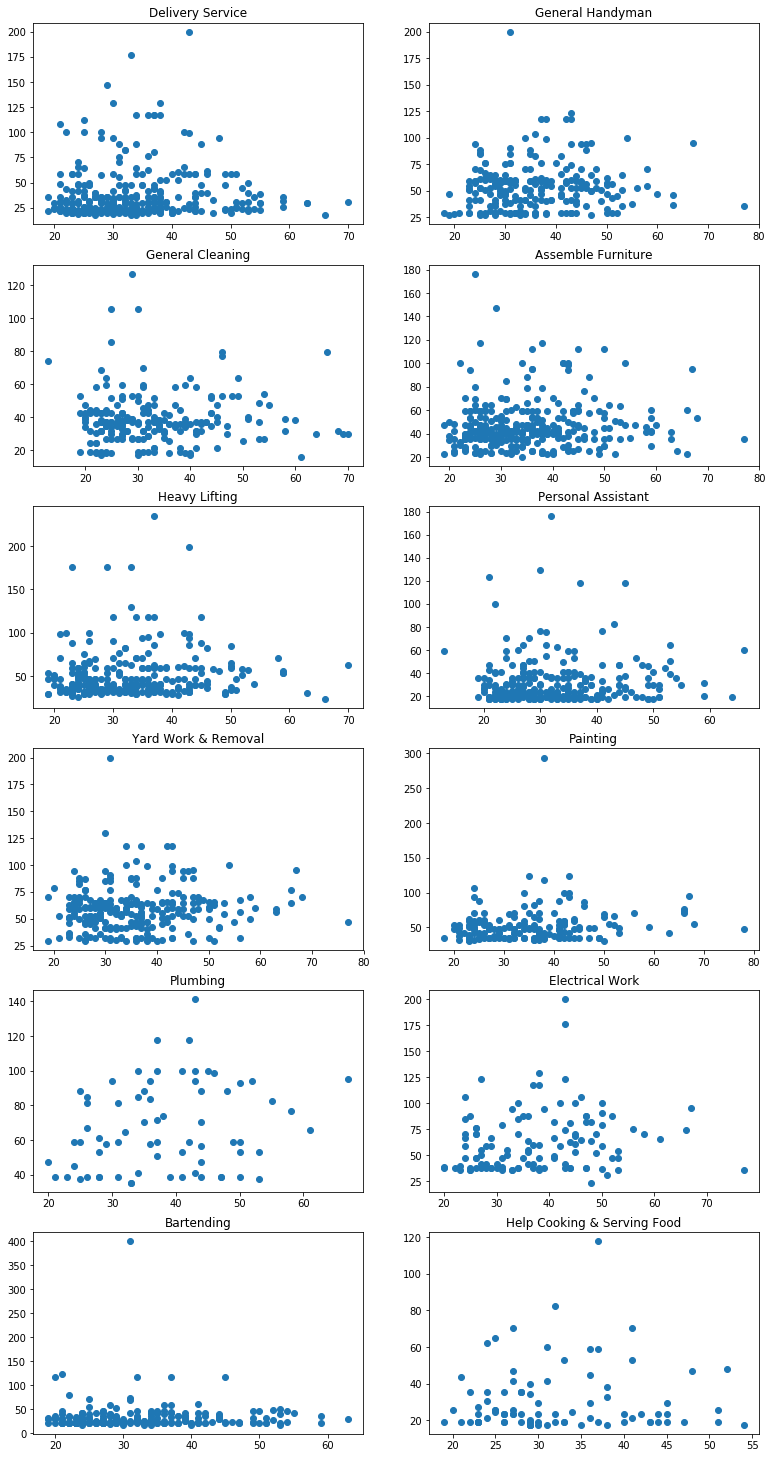

In [8]:
plot_data_age = {service: get_all_age(c, service[0]) for service in services}

fig_original = plt.figure(figsize=(13, 20))
rows, columns = 6, 2 
colors = ["#1696d2", "#fdbf11"]


plt.subplots_adjust(bottom = -0.1)
[fig_original.add_subplot(rows, columns, i + 1, title=service[1])
 .scatter(plot_data_age[service][0], plot_data_age[service][1]) 
for i, service in enumerate(plot_data_age.keys())]

print ([stats.spearmanr(plot_data[service][0], plot_data[service][1])[0]
        for i, service in enumerate(plot_data.keys())])

fig_hists  = plt.figure(figsize=(13, 20))
[fig_hists.add_subplot(rows, columns, i + 1, title=service[1])
 .hist(plot_data_age[service][0]) 
for i, service in enumerate(plot_data_age.keys())]

plt.show()

Now let us take a look at the relationship between the predicted mood of the taskers and the price in each service:

In [ ]:
plot_data = {service: get_all_moods(c, service[0]) for service in services}

fig_original = plt.figure(figsize=(13, 20))
rows, columns = 6, 2
colors = ["#1696d2", "#fdbf11"]

plt.subplots_adjust(bottom = -0.1)
[fig_original.add_subplot(rows, columns, i + 1, title=service[1])
 .scatter(plot_data[service][0], plot_data[service][1])
for i, service in enumerate(plot_data.keys())]

print ([stats.spearmanr(plot_data[service][0], plot_data[service][1])[0]
        for i, service in enumerate(plot_data.keys())])

plt.show()

In [ ]:
c.execute("SELECT ethnicity, COUNT(ethnicity) " +
          "FROM tasker_img_predictions, reviews " +
          "WHERE reviews.tasker_id = tasker_img_predictions.tasker_id AND reviews.rating = 'negative' " +
          "GROUP BY tasker_img_predictions.ethnicity")

negative_reviews_by_ethnic = list(c.fetchall())

c.execute("SELECT ethnicity, COUNT(ethnicity) " +
          "FROM tasker_img_predictions, reviews " +
          "WHERE reviews.tasker_id = tasker_img_predictions.tasker_id " +
          "GROUP BY tasker_img_predictions.ethnicity")

total_reviews_by_ethnic = list(c.fetchall())

ethnic_count_dict = {ethnicity: count for (ethnicity, count) in negative_reviews_by_ethnic}
percent_negative_by_ethnic = [(ethnic_count_dict[ethnicity]/negative) 
        for (ethnicity, negative) in total_reviews_by_ethnic]

fig_original = plt.figure(figsize=(10, 15))
plt.subplots_adjust(left=None, bottom=0., right=None, top=None, hspace=5)
rows, columns = 6, 2
#plt.title("Percentage of positive (yellow) and negative (blue) reviews")
[fig_original.add_subplot(rows, columns, i + 1, title=total_reviews_by_ethnic[i][0], ymargin=100000)
 .pie([ethnicity, 1 - ethnicity], colors=colors_binary, autopct=lambda x:'%1.2f' % x + "%", radius=7)
 for i, ethnicity in enumerate(percent_negative_by_ethnic)]

plt.show()

In [ ]:
#Prepare dataframes
plot_data = {service[1]: get_all(c, service[0]) for service in services}
col_names = ["age", "mood", "ethnicity", "gender", "price"]
dataframes = [pd.DataFrame(list(plot_data[service])).transpose() for service in plot_data.keys()]
dp = DataPreparation()
for i in range(0, len(dataframes)):
    print(services[i][1])
    dataframes[i].columns = col_names
    
    y = dataframes[i]['price']
    dataframes[i].drop(['price'], axis=1, inplace=True)
    
    #Dummies for ethnicity and gender
    ethnicity_dummies = pd.get_dummies(dataframes[i]['ethnicity'], prefix='ethnic', dummy_na=True)
    gender_dummies = pd.get_dummies(dataframes[i]['gender'], prefix='gender', dummy_na=True)
    
    #Drop ethnicity and gender
    dataframes[i].drop('ethnicity', axis=1, inplace=True)
    dataframes[i].drop('gender', axis=1, inplace=True)
    
    #Scale data
    dataframes[i] = dp.scale_data(dataframes[i])
    
    #Append dummies
    dataframes[i] = pd.concat([dataframes[i], ethnicity_dummies, gender_dummies],
                                    axis=1).drop(['ethnic_nan'], axis=1).drop(['gender_nan'], axis=1)
    
    dataframes[i].drop(['age', 'ethnic_INDIA', 'gender_Female', 'ethnic_WHITE', 'ethnic_ASIAN'], inplace=True, axis=1)
    est = sm.OLS(y.astype(float), dataframes[i].astype(float))
    est2 = est.fit()
    cols = list(dataframes[i].columns.values)
    print("\n\n")
    print(est2.summary(xname=cols))



Let us take a look at the proportion of white taskers in each postcode scraped for New York:

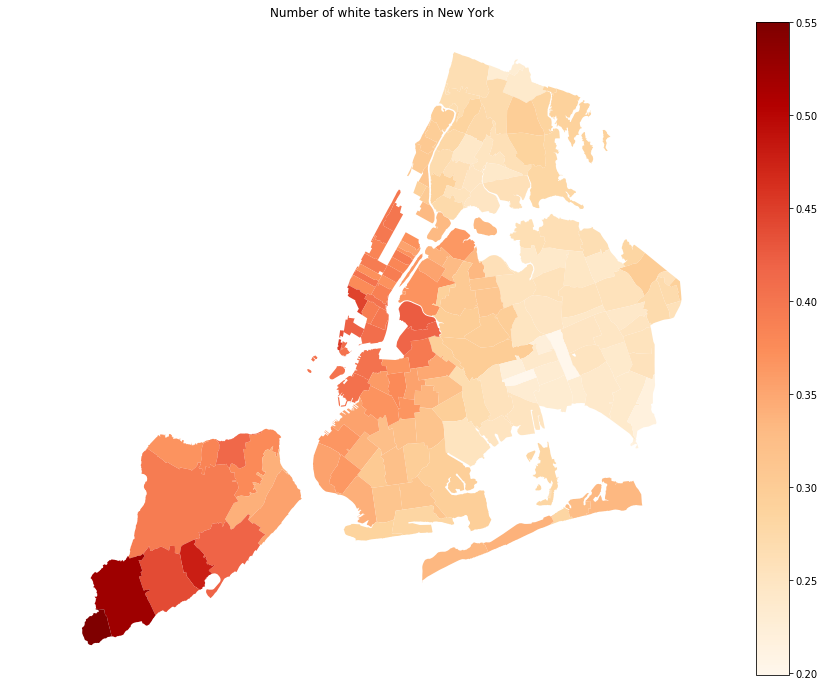

In [10]:
%run -i 'analysis/state_boundaries.py' 'taskers_white_prop' 'ny'

We can see that Staten Island seems to have the highest proportion of white taskers across its postcodes. This is consistent with the fact that it is the borough with the highest percentage of white population, followed by Manhattan: https://en.m.wikipedia.org/wiki/Demographics_of_New_York_City#Population

Correlation coefficient of postcode percent white population and percent white taskers operating in the area...

{'ASIAN': 10, 'BLACK': 123, 'INDIA': 17, 'WHITE': 63}
{'ASIAN': 12, 'BLACK': 119, 'INDIA': 17, 'WHITE': 70}
{'ASIAN': 11, 'BLACK': 101, 'INDIA': 16, 'WHITE': 54}
{'ASIAN': 8, 'BLACK': 116, 'INDIA': 11, 'WHITE': 57}
{'ASIAN': 5, 'BLACK': 77, 'INDIA': 10, 'WHITE': 37}
{'ASIAN': 7, 'BLACK': 112, 'INDIA': 19, 'WHITE': 51}
{'ASIAN': 10, 'BLACK': 114, 'INDIA': 14, 'WHITE': 47}
{'ASIAN': 5, 'BLACK': 97, 'INDIA': 11, 'WHITE': 40}
{'ASIAN': 5, 'BLACK': 99, 'INDIA': 13, 'WHITE': 41}
{'ASIAN': 19, 'BLACK': 145, 'INDIA': 26, 'WHITE': 110}
{'ASIAN': 10, 'BLACK': 127, 'INDIA': 13, 'WHITE': 63}
{'ASIAN': 6, 'BLACK': 100, 'INDIA': 11, 'WHITE': 49}
{'ASIAN': 9, 'BLACK': 114, 'INDIA': 12, 'WHITE': 45}
{'ASIAN': 9, 'BLACK': 117, 'INDIA': 16, 'WHITE': 50}
{'ASIAN': 6, 'BLACK': 87, 'INDIA': 8, 'WHITE': 32}
{'ASIAN': 18, 'BLACK': 133, 'INDIA': 26, 'WHITE': 117}
{'ASIAN': 5, 'BLACK': 69, 'INDIA': 

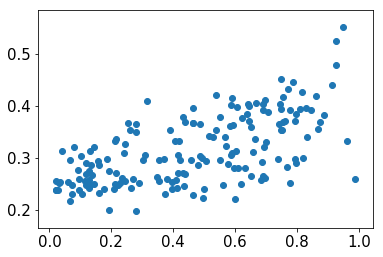

{'ASIAN': 27, 'BLACK': 42, 'INDIA': 29, 'WHITE': 96}
{'ASIAN': 26, 'BLACK': 42, 'INDIA': 28, 'WHITE': 94}
{'ASIAN': 25, 'BLACK': 43, 'INDIA': 28, 'WHITE': 96}
{'ASIAN': 24, 'BLACK': 44, 'INDIA': 26, 'WHITE': 95}
{'ASIAN': 28, 'BLACK': 45, 'INDIA': 28, 'WHITE': 96}
{'ASIAN': 26, 'BLACK': 42, 'INDIA': 28, 'WHITE': 98}
{'ASIAN': 26, 'BLACK': 40, 'INDIA': 28, 'WHITE': 97}
{'ASIAN': 27, 'BLACK': 41, 'INDIA': 26, 'WHITE': 95}
{'ASIAN': 23, 'BLACK': 42, 'INDIA': 26, 'WHITE': 98}
{'ASIAN': 24, 'BLACK': 32, 'INDIA': 26, 'WHITE': 90}
{'ASIAN': 27, 'BLACK': 42, 'INDIA': 28, 'WHITE': 95}
{'ASIAN': 28, 'BLACK': 40, 'INDIA': 29, 'WHITE': 97}
{'ASIAN': 22, 'BLACK': 25, 'INDIA': 25, 'WHITE': 91}
{'ASIAN': 28, 'BLACK': 40, 'INDIA': 28, 'WHITE': 97}
{'ASIAN': 25, 'BLACK': 38, 'INDIA': 28, 'WHITE': 99}
{'ASIAN': 20, 'BLACK': 30, 'INDIA': 25, 'WHITE': 94}
{'ASIAN': 25, 'BLACK': 37, 'INDIA': 28, 'WHITE': 98}
{'ASIAN': 24, 'BLACK': 36, 'INDIA': 28, 'WHITE': 94}
{'ASIAN': 22, 'BLACK': 33, 'INDIA': 23, 'WHITE

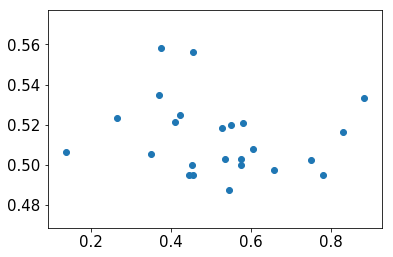

{'ASIAN': 12, 'BLACK': 43, 'INDIA': 9, 'WHITE': 81}
{'ASIAN': 12, 'BLACK': 43, 'INDIA': 11, 'WHITE': 87}
{'ASIAN': 12, 'BLACK': 47, 'INDIA': 11, 'WHITE': 73}
{'ASIAN': 9, 'BLACK': 32, 'INDIA': 9, 'WHITE': 66}
{'ASIAN': 14, 'BLACK': 47, 'INDIA': 10, 'WHITE': 82}
{'ASIAN': 1, 'BLACK': 3, 'INDIA': 3, 'WHITE': 18}
{'ASIAN': 16, 'BLACK': 48, 'INDIA': 14, 'WHITE': 81}
{'ASIAN': 8, 'BLACK': 31, 'INDIA': 10, 'WHITE': 32}
{'ASIAN': 3, 'BLACK': 16, 'INDIA': 3, 'WHITE': 41}
{'ASIAN': 20, 'BLACK': 49, 'INDIA': 14, 'WHITE': 94}
{'ASIAN': 16, 'BLACK': 50, 'INDIA': 12, 'WHITE': 79}
{'ASIAN': 15, 'BLACK': 51, 'INDIA': 14, 'WHITE': 75}
{'ASIAN': 14, 'BLACK': 38, 'INDIA': 16, 'WHITE': 68}
{'ASIAN': 14, 'BLACK': 37, 'INDIA': 13, 'WHITE': 83}
{'ASIAN': 10, 'BLACK': 38, 'INDIA': 10, 'WHITE': 59}
{'ASIAN': 19, 'BLACK': 49, 'INDIA': 13, 'WHITE': 92}
{'ASIAN': 11, 'BLACK': 36, 'INDIA': 13, 'WHITE': 71}
{'ASIAN': 14, 'BLACK': 46, 'INDIA': 15, 'WHITE': 67}
{'ASIAN': 15, 'BLACK': 30, 'INDIA': 14, 'WHITE': 72}
{'

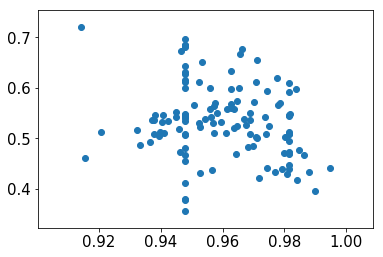

In [21]:
import numpy as np
from scipy.stats import spearmanr

print ("Correlation coefficient of postcode percent white population and percent white taskers operating in the area...\n")
location_id_diffs = [0, 0, 26]
db_names = {"New York": "ny", "San Francisco": "san_francisco", "Los Angeles": "los_angeles"}

for i, city in enumerate(list(db_names.keys())):
    conn = sqlite3.connect("databases/taskrabbit_" + db_names[city] + ".db")
    c = conn.cursor()
    c2= conn.cursor()
    c.execute("SELECT location_id, per_white FROM location_demographics")
    dct = {row[0]: {"per_white": row[1]/100 } for row in c.fetchall()}

    for location_id in dct.keys():
        c2.execute(
            "SELECT ethnicity, COUNT(*) FROM tasker_img_predictions, tasker_locations, taskers, locations WHERE tasker_locations.location_id =locations.location_id AND tasker_locations.tasker_id = taskers.tasker_id AND locations.location_id = " + str(
                location_id + location_id_diffs[i]) + " AND tasker_img_predictions.tasker_id = taskers.tasker_id GROUP BY ethnicity;")
        total = 0
        dict_num = {}
        for row2 in c2.fetchall():
            total += row2[1]
            dict_num[row2[0]] = row2[1]
        print (dict_num)

        dct[location_id]["per_white_taskers"] = dict_num["WHITE"]/total

    arr_1 = [dct[location_id]["per_white"] for location_id in dct.keys()]
    arr_2 = [dct[location_id]["per_white_taskers"] for location_id in dct.keys()]
    print (spearmanr(arr_1, arr_2))
    plt.scatter(arr_1, arr_2)
    plt.show()
    conn.close()

